<a href="https://colab.research.google.com/github/kenji1996/-COLAB-Analise-acidentes-aereos/blob/main/Analise_Dados_CENIPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análise de Dados - Acidentes Aéreos Ocorridos no Brasil de 2010 a 2019 - CENIPA**



*Importação das bibliotecas*



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
import seaborn as sn

!pip install matplotlib --upgrade

pd.options.mode.chained_assignment = None

*Importação do dataset*

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/EdsonMSouza/08_T22_QUI_N/c3e88d6dc314808e3f0e215a0b71fb1379d69bb9/CENIPA/ocorrencias_cenipa.csv',sep=';',encoding='cp1252')

In [ ]:
df.head(3)

NameError: ignored

*Dropamos valores duplicados e verificamos se há algum valor nulo*

In [ ]:
df.drop_duplicates(inplace=True)
df.isnull().values.any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5242 entries, 0 to 5241
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo                     5242 non-null   int64 
 1   tipo                       5242 non-null   object
 2   descricao                  5242 non-null   object
 3   cidade                     5242 non-null   object
 4   estado                     5242 non-null   object
 5   data                       5242 non-null   object
 6   ano                        5242 non-null   int64 
 7   hora                       5242 non-null   object
 8   aeronave_liberada          5242 non-null   object
 9   status_investigacao        5242 non-null   object
 10  aeronaves_envolvidas       5242 non-null   int64 
 11  ocorrencia_saida_pista     5242 non-null   object
 12  aeronave_tipo              5242 non-null   object
 13  aeronave_fabricante        5242 non-null   object
 14  motor_ti

In [ ]:
for column in df.columns:
  print(f"Coluna {column}:")
  print(df[column].unique())
  print(len(df[column].unique().tolist()))
  print()

Coluna codigo:
[40107 40147 40148 ... 79123 79203 79227]
5242

Coluna tipo:
['ACIDENTE' 'INCIDENTE GRAVE' 'INCIDENTE']
3

Coluna descricao:
['COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO'
 'FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE' 'PANE SECA'
 'FALHA DO MOTOR EM VOO' 'COM TREM DE POUSO' 'ESTOURO DE PNEU' 'OUTROS'
 'TRÁFEGO AÉREO' 'FALHA DO MOTOR NO SOLO' 'POUSO EM LOCAL NÃO PREVISTO'
 'VAZAMENTO DE OUTROS FLUIDOS' 'COLISÃO COM AVE'
 'PERDA DE CONTROLE NO SOLO' 'PERDA DE CONTROLE EM VOO'
 'COLISÃO COM OBSTÁCULOS NO SOLO' 'POUSO SEM TREM' 'FOGO NO SOLO'
 'VAZAMENTO DE COMBUSTÍVEL' 'FOGO EM VOO' 'SUPERAQUECIMENTO'
 'POUSO ANTES DA PISTA' 'POUSO BRUSCO' 'OPERAÇÃO A BAIXA ALTITUDE'
 'F.O.D.' 'CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO'
 'COM PARA-BRISAS / JANELA / PORTA' 'PROBLEMAS FISIOLÓGICOS'
 'EXCURSÃO DE PISTA' 'POUSO LONGO' 'INDETERMINADO'
 'PERDA DE COMPONENTE NO SOLO' 'DESCOMPRESSÃO NÃO INTENCIONAL / EXPLOSIVA'
 'SOPRO DE REATOR' 'PERDA DE COMPONENTE EM VOO' 'COM COMA

*Realizamos a limpeza dos dados*

In [ ]:
# a primeira aeronave nasceu em 1903 e os dados são de 2010 até 2019, então qualquer ano fora disso é considerado inválido
df.loc[(df['aeronave_ano_fabricacao'] < 1903) | (df['aeronave_ano_fabricacao'] > 2019),'aeronave_ano_fabricacao'] = np.nan
# removemos valores indeterminados e não identificados onde o valor original é categórico portanto não há substituição
remover_elementos = ['INDETERMINADO','NÃO IDENTIFICADO']
for elemento in remover_elementos:
    df.replace({elemento:np.nan},inplace=True)

*Removemos todos os valores NaN do dataframe*

In [ ]:
df.dropna(inplace=True)

# Tipos de Motor x Eventos

## Gráficos

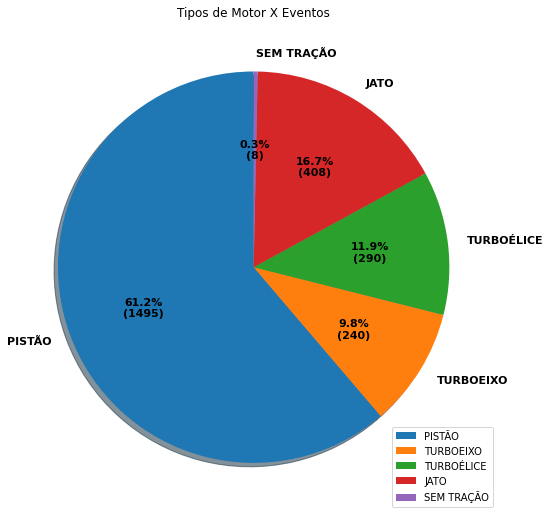

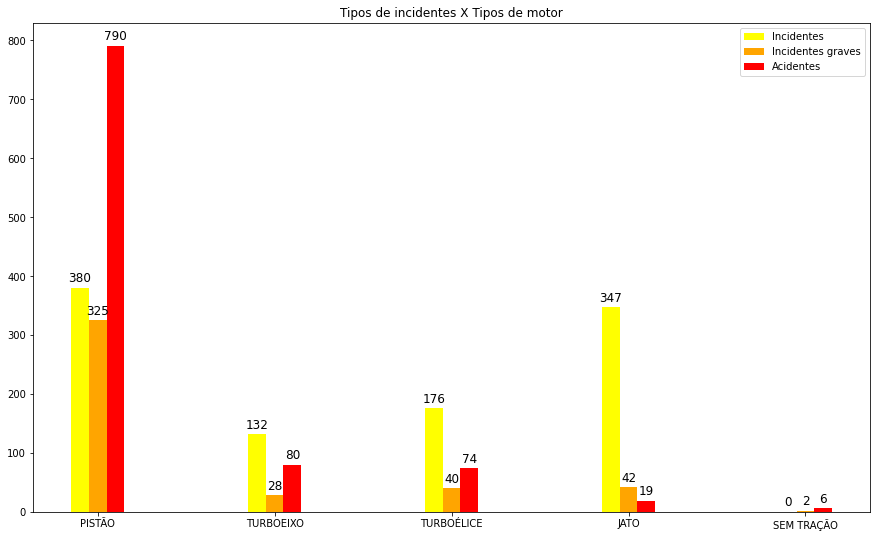

In [ ]:
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

tipo_motores = df['motor_tipo'].unique()
tipo_incidentes = df['tipo'].unique()

qte_por_motor = [sum(df.loc[(df['motor_tipo']==i)].value_counts()) for i in tipo_motores]
qte_por_inc_motor = [list(sum(df.loc[(df['motor_tipo']==i) & (df['tipo']=='INCIDENTE')].value_counts()) for i in tipo_motores),
                 list(sum(df.loc[(df['motor_tipo']==i) & (df['tipo']=='INCIDENTE GRAVE')].value_counts()) for i in tipo_motores),
                 list(sum(df.loc[(df['motor_tipo']==i) & (df['tipo']=='ACIDENTE')].value_counts()) for i in tipo_motores)]

tamanho_qte_por_inc_motor = [sum(qte_por_inc_motor[0]),sum(qte_por_inc_motor[1]),sum(qte_por_inc_motor[2])]

incid_arange, incidg_arange, acid_arange = np.arange(len(qte_por_inc_motor[0])), np.arange(len(qte_por_inc_motor[1])), np.arange(len(qte_por_inc_motor[2]))

fig2, ax2 = plt.subplots(figsize=(15,9))
fig, ax= plt.subplots(figsize=(15,9))

wedges, texts, autotexts = ax2.pie(qte_por_motor,labels=tipo_motores, autopct=lambda pct: func(pct, qte_por_motor), shadow=True, startangle=90,)
i = ax.bar(incid_arange - 0.1, qte_por_inc_motor[0], 0.1 , label='Incidentes', color='Yellow')
ig = ax.bar(incidg_arange, qte_por_inc_motor[1], 0.1, label='Incidentes graves', color='Orange')
a = ax.bar(acid_arange + 0.1, qte_por_inc_motor[2], 0.1, label='Acidentes', color='Red')

plt.legend(loc='upper left')
plt.title('Motor X Incidentes')
plt.setp(autotexts,**{'color':'black', 'weight':'bold', 'fontsize':11})
plt.setp(texts,**{'color':'black', 'weight':'bold', 'fontsize':11})

ax.set_xticks(np.arange(len(tipo_motores)))
ax.set_xticklabels(tipo_motores)
ax.bar_label(i,**{'padding':3},fontsize=12),ax.bar_label(ig,**{'padding':3},fontsize=12),ax.bar_label(a,**{'padding':3},fontsize=12)
rects = ax.patches

ax2.set_title("Tipos de Motor X Eventos")
ax2.legend(loc='best')

plt.legend(loc='best')
plt.title( 'Tipos de incidentes X Tipos de motor')
plt.show()


## Análise

Os gráficos indicam que que as aeronaves de motor do tipo PISTÃO estão mais propensas a sofrer algum tipo de incidente do que os outros tipos de motor.

O número de acidentes do motor **PISTÃO** representa 81% de todos os **ACIDENTES** e 74% de todos os **INCIDENTES GRAVES**.

Através das informações reunidas, pode-se dizer que o aeronaves que usam **PISTÃO** estão mais propensos a sofrer **ACIDENTES** do que os outros tipos.

In [ ]:
tipo_motores_df = df[['tipo', 'motor_tipo']]
tipo_df = df[['tipo']]

for i in tipo_motores_df.motor_tipo:
    tipo_df[i] = tipo_motores_df.motor_tipo == i

media_tipodf = tipo_df.groupby('tipo').mean()
std_tipodf = tipo_df.groupby('tipo').std()
corr_tipodf = tipo_df.groupby('tipo').corr()

print(f'\n{media_tipodf}\n')
print(f'\n{std_tipodf}\n')
print(f'\n{corr_tipodf}\n')


                   PISTÃO  TURBOEIXO  TURBOÉLICE      JATO  SEM TRAÇÃO
tipo                                                                  
ACIDENTE         0.815273   0.082559    0.076367  0.019608    0.006192
INCIDENTE        0.367150   0.127536    0.170048  0.335266    0.000000
INCIDENTE GRAVE  0.743707   0.064073    0.091533  0.096110    0.004577


                   PISTÃO  TURBOEIXO  TURBOÉLICE      JATO  SEM TRAÇÃO
tipo                                                                  
ACIDENTE         0.388276   0.275357    0.265722  0.138720    0.078485
INCIDENTE        0.482261   0.333734    0.375857  0.472311    0.000000
INCIDENTE GRAVE  0.437086   0.245164    0.288696  0.295080    0.067573


                              PISTÃO  TURBOEIXO  ...      JATO  SEM TRAÇÃO
tipo                                             ...                      
ACIDENTE        PISTÃO      1.000000  -0.630204  ... -0.297100   -0.165825
                TURBOEIXO  -0.630204   1.000000  ... -0.0424

# Quantidade de assentos X eventos



## Gráficos


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


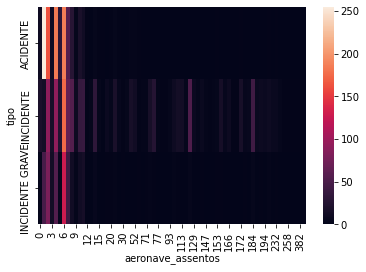

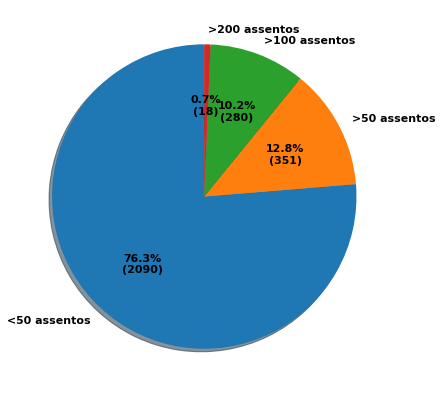

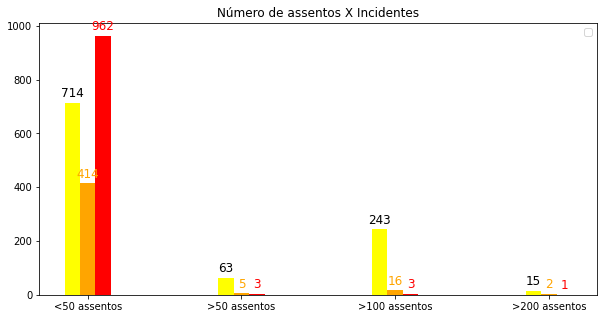

In [ ]:
aero_assentos_tipos = ['<50 assentos', '>50 assentos', '>100 assentos', '>200 assentos']

inc_ = [sum(df.loc[(df['aeronave_assentos'] <= 50) & (df['tipo'] == 'INCIDENTE')].value_counts()),
            sum(df.loc[(df['aeronave_assentos'] > 50) & (df['aeronave_assentos'] <= 100) & (df['tipo'] == 'INCIDENTE')].value_counts()),
            sum(df.loc[(df['aeronave_assentos'] > 100) & (df['aeronave_assentos'] <= 200) & (df['tipo'] == 'INCIDENTE')].value_counts()),
            sum(df.loc[(df['aeronave_assentos'] > 200) & (df['tipo'] == 'INCIDENTE')].value_counts())]

acid_ = [sum(df.loc[(df['aeronave_assentos'] <= 50) & (df['tipo'] == 'ACIDENTE')].value_counts()),
            sum(df.loc[(df['aeronave_assentos'] > 50) & (df['aeronave_assentos'] <= 100) & (df['tipo'] == 'ACIDENTE')].value_counts()),
            sum(df.loc[(df['aeronave_assentos'] > 100) & (df['aeronave_assentos'] <= 200) & (df['tipo'] == 'ACIDENTE')].value_counts()),
            sum(df.loc[(df['aeronave_assentos'] > 200) & (df['tipo'] == 'ACIDENTE')].value_counts())]

incg_ = [sum(df.loc[(df['aeronave_assentos'] <= 50) & (df['tipo'] == 'INCIDENTE GRAVE')].value_counts()),
            sum(df.loc[(df['aeronave_assentos'] > 50) & (df['aeronave_assentos'] <= 100) & (df['tipo'] == 'INCIDENTE GRAVE')].value_counts()),
            sum(df.loc[(df['aeronave_assentos'] > 100) & (df['aeronave_assentos'] <= 200) & (df['tipo'] == 'INCIDENTE GRAVE')].value_counts()),
            sum(df.loc[(df['aeronave_assentos'] > 200) & (df['tipo'] == 'INCIDENTE GRAVE')].value_counts())]

all_ = [sum(df.loc[(df['aeronave_assentos'] <= 50)].value_counts()),
        sum(df.loc[(df['aeronave_assentos'] > 50)].value_counts()),
        sum(df.loc[(df['aeronave_assentos'] > 100)].value_counts()),
        sum(df.loc[(df['aeronave_assentos'] > 200)].value_counts())]

inc_tamanho,acid_tamanho,incg_tamanho = np.arange(len(inc_)), np.arange(len(acid_)), np.arange(len(incg_))

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

aeronave_assentos_tipo = df[['tipo', 'aeronave_assentos']]
aeronave_assentos_tipo.apply(lambda x: x.factorize()[0]).corr()
sn.heatmap(pd.crosstab(aeronave_assentos_tipo.tipo,aeronave_assentos_tipo.aeronave_assentos))

fig, ax = plt.subplots(figsize=(12,7))
fig_n_assentos, ax_n_assentos = plt.subplots(figsize=(10,5))

wedges, texts, autotexts = ax.pie(all_, labels=aero_assentos_tipos, shadow=True, startangle=90, autopct=lambda pct: func(pct, all_))

barra_assentos_inc = ax_n_assentos.bar(inc_tamanho - 0.1,inc_,0.1, color="Yellow")
barra_assentos_incg = ax_n_assentos.bar(inc_tamanho,incg_,0.1, color="Orange")
barra_assentos_acid = ax_n_assentos.bar(inc_tamanho + 0.1,acid_,0.1, color="Red")

ax_n_assentos.set_title("Número de assentos X eventos")
ax_n_assentos.legend(aero_assentos_tipos)
ax_n_assentos.set_xticks(inc_tamanho)
ax_n_assentos.set_xticklabels(aero_assentos_tipos)
ax_n_assentos.bar_label(barra_assentos_inc,**{'padding':3},fontsize=12)
ax_n_assentos.bar_label(barra_assentos_incg,**{'padding':3},fontsize=12,color="Orange")
ax_n_assentos.bar_label(barra_assentos_acid,**{'padding':3},fontsize=12,color="Red")

plt.title('Número de assentos X Incidentes')
plt.setp(autotexts,**{'color':'black', 'weight':'bold', 'fontsize':11})
plt.setp(texts,**{'color':'black', 'weight':'bold', 'fontsize':11})
plt.legend()
plt.show()



## Análise

Segundo os gráficos, a maior parte dos eventos são com **menos de 50 assentos**, especificamente nos intervalos **0 (apenas pilotos) e 6**.

Através dos gráficos, percebe-se que existe uma relação inversa entre o ***número de incidentes, incidentes graves e acidentes*** X ***número de assentos***, sugerindo que aeronaves de maior porte são mais seguros do que os de menor porte.

In [ ]:
qte_motor_df = df[['tipo', 'aeronave_assentos']]
tipo_df = df[['tipo']]

for i in qte_motor_df.aeronave_assentos:
    tipo_df[i] = qte_motor_df.aeronave_assentos == i

media_tipodf = tipo_df.groupby('tipo').mean()
std_tipodf = tipo_df.groupby('tipo').std()
corr_tipodf = tipo_df.groupby('tipo').corr()

print(f'\n{media_tipodf}\n')
print(f'\n{std_tipodf}\n')
print(f'\n{corr_tipodf}\n')


                      7         6         2    ...       288       147       284
tipo                                           ...                              
ACIDENTE         0.057792  0.191950  0.167183  ...  0.000000  0.000000  0.000000
INCIDENTE        0.062802  0.169082  0.087923  ...  0.000966  0.001932  0.000966
INCIDENTE GRAVE  0.091533  0.292906  0.180778  ...  0.000000  0.000000  0.000000

[3 rows x 68 columns]


                      7         6         2    ...       288       147       284
tipo                                           ...                              
ACIDENTE         0.233469  0.394038  0.373332  ...  0.000000  0.000000  0.000000
INCIDENTE        0.242724  0.375006  0.283319  ...  0.031083  0.043937  0.031083
INCIDENTE GRAVE  0.288696  0.455617  0.385275  ...  0.000000  0.000000  0.000000

[3 rows x 68 columns]


                          7         6         2         14   ...  384  288  147  284
tipo                                                  

# Tipos de Aeronaves X Eventos


## Gráficos


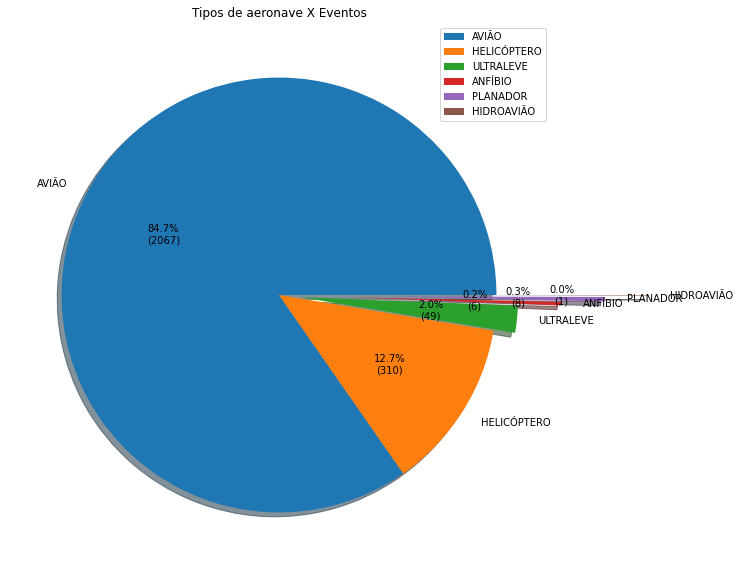

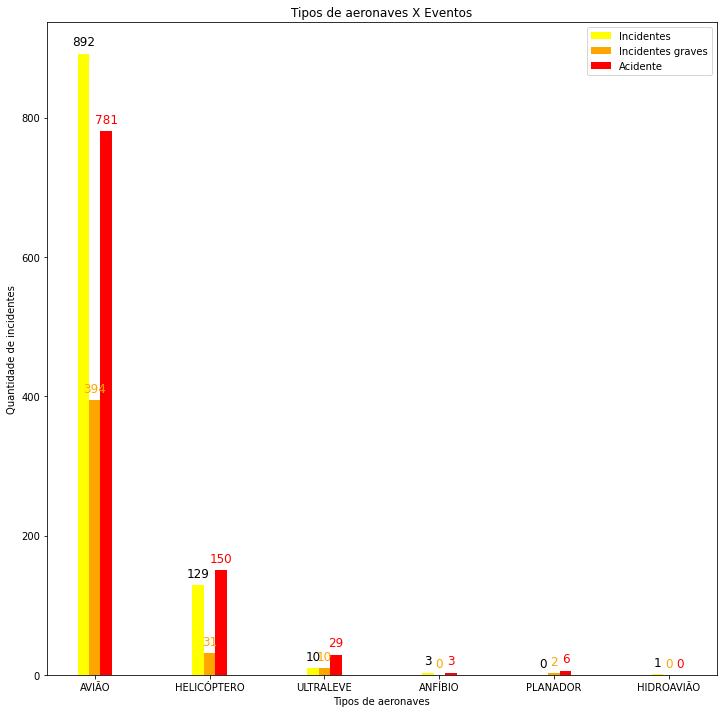

In [ ]:
tipos_aeronaves = df['aeronave_tipo'].unique() #todos os tipos de aeronaves em uma lista

qte_por_tipo = [sum(df.loc[df['aeronave_tipo'] == i].value_counts()) for i in tipos_aeronaves]
qte_inc_por_tipo = [list(sum(df.loc[(df['aeronave_tipo']==i) & (df['tipo']=='INCIDENTE')].value_counts()) for i in tipos_aeronaves),
                    list(sum(df.loc[(df['aeronave_tipo']==i) & (df['tipo']=='INCIDENTE GRAVE')].value_counts()) for i in tipos_aeronaves),
                    list(sum(df.loc[(df['aeronave_tipo']==i) & (df['tipo']=='ACIDENTE')].value_counts()) for i in tipos_aeronaves)]
pos_qteportipo = np.arange(len(qte_por_tipo))
explode = [0,0,0.1,0.3,0.5,0.7]

fig1, ax1 = plt.subplots(figsize=(10,10))
fig, ax = plt.subplots(figsize=(12,12))

container_tipo_aeronave = ax1.pie(qte_por_tipo, labels=tipos_aeronaves, explode=explode, autopct=lambda pct: func(pct, qte_por_tipo), shadow=True, startangle=0)
container_inc = ax.bar(pos_qteportipo - 0.1, qte_inc_por_tipo[0], 0.1, label='Incidentes', color='Yellow')
container_incg = ax.bar(pos_qteportipo, qte_inc_por_tipo[1], 0.1, label='Incidentes graves', color='Orange')
container_acid = ax.bar(pos_qteportipo + 0.1, qte_inc_por_tipo[2], 0.1, label='Acidente', color='Red')

ax.set_xticks(pos_qteportipo)
ax.set_xticklabels(tipos_aeronaves)
ax.set_title('Tipos de aeronaves X Eventos')
ax.set_xlabel('Tipos de aeronaves')
ax.set_ylabel('Quantidade de incidentes')
ax.bar_label(container_inc, **{'padding':5}, fontsize=12, color='Black')
ax.bar_label(container_incg, **{'padding':5}, fontsize=12, color='Orange')
ax.bar_label(container_acid, **{'padding':5}, fontsize=12, color='Red')

ax1.set_title('Tipos de aeronave X Eventos')
ax1.legend(tipos_aeronaves)

plt.legend()
plt.show()

## Análise

**AVIÕES e HELICÓPTEROS** constituem 96% dos **ACIDENTES**, 98.5% dos **INCIDENTES** e 97% dos **INCIDENTES GRAVES**, sendo a maior parte deles dos **AVIÕES** (80.5%, 86.1%, 90.1%).


**HELICÓPTEROS** possuem mais **ACIDENTES** (48% dos eventos) do que **INCIDENTES** e **INCIDENTES GRAVES**, sugerindo maior chance de **ACIDENTES** do que **INCIDENTES**.



In [ ]:
tipos_aeronaves_df = df[['tipo', 'aeronave_tipo']]
tipo_df = df[['tipo']]

for i in tipos_aeronaves_df.aeronave_tipo:
    tipo_df[i] = tipos_aeronaves_df.aeronave_tipo == i

media_tipodf = tipo_df.groupby('tipo').mean()
std_tipodf = tipo_df.groupby('tipo').std()
corr_tipodf = tipo_df.groupby('tipo').corr()

print(f'\n{media_tipodf}\n')
print(f'\n{std_tipodf}\n')
print(f'\n{corr_tipodf}\n')


                    AVIÃO  HELICÓPTERO  ...  PLANADOR  HIDROAVIÃO
tipo                                    ...                      
ACIDENTE         0.805986     0.154799  ...  0.006192    0.000000
INCIDENTE        0.861836     0.124638  ...  0.000000    0.000966
INCIDENTE GRAVE  0.901602     0.070938  ...  0.004577    0.000000

[3 rows x 6 columns]


                    AVIÃO  HELICÓPTERO  ...  PLANADOR  HIDROAVIÃO
tipo                                    ...                      
ACIDENTE         0.395644     0.361900  ...  0.078485    0.000000
INCIDENTE        0.345239     0.330467  ...  0.000000    0.031083
INCIDENTE GRAVE  0.298194     0.257016  ...  0.067573    0.000000

[3 rows x 6 columns]


                                AVIÃO  HELICÓPTERO  ...  PLANADOR  HIDROAVIÃO
tipo                                                ...                      
ACIDENTE        AVIÃO        1.000000    -0.872269  ... -0.160883         NaN
                HELICÓPTERO -0.872269     1.000000  ... -

# Quantidade de Motores X Eventos


## Gráficos


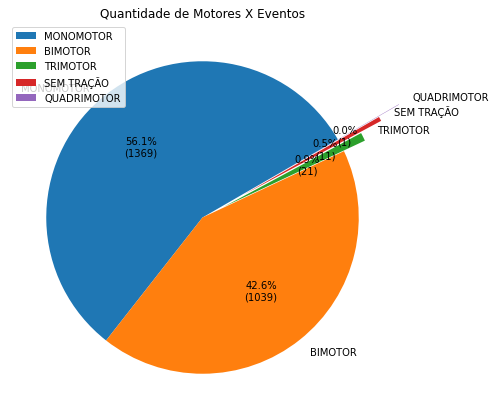

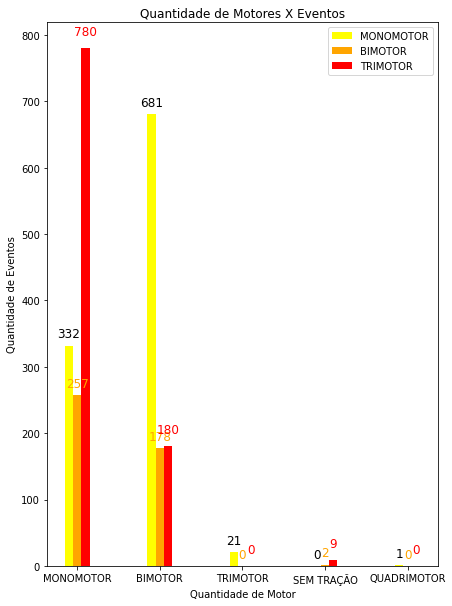

In [ ]:
tipos_motor_quantidade = df['aeronave_motor_quantidade'].unique()

qte_tipos_motor = [sum(df.loc[df['aeronave_motor_quantidade'] == i].value_counts()) for i in tipos_motor_quantidade]

qte_tipos_motor_sep = [list(sum(df.loc[(df['aeronave_motor_quantidade'] == i) & (df['tipo']=='INCIDENTE')].value_counts()) for i in tipos_motor_quantidade),
                       list(sum(df.loc[(df['aeronave_motor_quantidade'] == i) & (df['tipo']=='INCIDENTE GRAVE')].value_counts()) for i in tipos_motor_quantidade),
                       list(sum(df.loc[(df['aeronave_motor_quantidade'] == i) & (df['tipo']=='ACIDENTE')].value_counts()) for i in tipos_motor_quantidade)]

pos_tipos_motor = np.arange(len(qte_tipos_motor))
explode = [0,0,0.15,0.3,0.45]

qte_motor_df = df[['tipo', 'aeronave_motor_quantidade']]
tipo_df = df[['tipo']]

for i in qte_motor_df.aeronave_motor_quantidade:
    tipo_df[i] = qte_motor_df.aeronave_motor_quantidade == i

fig, ax = plt.subplots(figsize=(7,10))
fig1, ax1 = plt.subplots(figsize=(7,10))

pizza_tipos_motor = ax.pie(qte_tipos_motor, labels=tipos_motor_quantidade, explode=explode, autopct=lambda pct: func(pct, qte_tipos_motor), startangle=30)
barra_tipos_motor_inc = ax1.bar(pos_tipos_motor - 0.1, qte_tipos_motor_sep[0], 0.1, label='Incidentes', color='Yellow')
barra_tipos_motor_incg = ax1.bar(pos_tipos_motor, qte_tipos_motor_sep[1], 0.1, label='Incidentes grave', color='Orange')
barra_tipos_motor_acid = ax1.bar(pos_tipos_motor + 0.1, qte_tipos_motor_sep[2], 0.1, label='Acidentes', color='Red')

ax.set_title('Quantidade de Motores X Eventos')
ax.legend(loc='best')

ax1.set_title('Quantidade de Motores X Eventos')
ax1.legend(tipos_motor_quantidade, loc='best')
ax1.set_xticks(pos_tipos_motor)
ax1.set_xticklabels(tipos_motor_quantidade)
ax1.set_xlabel('Quantidade de Motor')
ax1.set_ylabel('Quantidade de Eventos')
ax1.bar_label(barra_tipos_motor_inc, **{'padding':5}, fontsize=12, color='Black')
ax1.bar_label(barra_tipos_motor_incg, **{'padding':5}, fontsize=12, color='Orange')
ax1.bar_label(barra_tipos_motor_acid, **{'padding':10}, fontsize=12, color='Red')

plt.show()

## Análise

A maioria dos eventos ocorreram com aeronaves **MONOMOTOR e BIMOTOR** (cerca de 99%) e, a medida que aumentamos o número de motores aumenta, a quantidade de eventos diminui, o que sugere maior segurança em aeronaves com mais motores.

In [ ]:
quantidade_motor_aeronaves_df = df[['tipo', 'aeronave_motor_quantidade']]
tipo_df = df[['tipo']]

for i in quantidade_motor_aeronaves_df.aeronave_motor_quantidade:
    tipo_df[i] = quantidade_motor_aeronaves_df.aeronave_motor_quantidade == i

media_tipodf = tipo_df.groupby('tipo').mean()
std_tipodf = tipo_df.groupby('tipo').std()
corr_tipodf = tipo_df.groupby('tipo').corr()

print(f'\n{media_tipodf}\n')
print(f'\n{std_tipodf}\n')
print(f'\n{corr_tipodf}\n')


                 MONOMOTOR   BIMOTOR  TRIMOTOR  SEM TRAÇÃO  QUADRIMOTOR
tipo                                                                   
ACIDENTE          0.804954  0.185759   0.00000    0.009288     0.000000
INCIDENTE         0.320773  0.657971   0.02029    0.000000     0.000966
INCIDENTE GRAVE   0.588101  0.407323   0.00000    0.004577     0.000000


                 MONOMOTOR   BIMOTOR  TRIMOTOR  SEM TRAÇÃO  QUADRIMOTOR
tipo                                                                   
ACIDENTE          0.396441  0.389113  0.000000    0.095975     0.000000
INCIDENTE         0.466999  0.474619  0.141058    0.000000     0.031083
INCIDENTE GRAVE   0.492741  0.491899  0.000000    0.067573     0.000000


                             MONOMOTOR   BIMOTOR  ...  SEM TRAÇÃO  QUADRIMOTOR
tipo                                              ...                         
ACIDENTE        MONOMOTOR     1.000000 -0.970318  ...   -0.196699          NaN
                BIMOTOR      -0.970318